<a href="https://colab.research.google.com/github/fabienne-lab/CSI-4142/blob/main/ProjetFinalCSI4142.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing required packages
import pandas as pd
import seaborn as sns
import numpy as np


# Data loading

In [3]:
!gdown 1HLiXcB65wyen1c5tgFiwxJLJng283XMh

Downloading...
From: https://drive.google.com/uc?id=1HLiXcB65wyen1c5tgFiwxJLJng283XMh
To: /content/eda_data.csv
100% 3.12M/3.12M [00:00<00:00, 133MB/s]


In [4]:
#loading dataset
df=pd.read_csv('eda_data.csv')

In [5]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


# Data cleaning and transformation

##### Columns removing
Let's remove irrelevant column for our analysis. 

In [6]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [7]:
df = df.drop(columns = ["Unnamed: 0","Headquarters","Sector","age","Salary Estimate","Job Description","hourly","employer_provided","company_txt","job_state","Competitors","same_state","python_yn","R_yn","spark","aws","excel","seniority","desc_len","num_comp"])
df.head()

,Job Title,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Revenue,min_salary,max_salary,avg_salary,job_simp
0,Data Scientist,3.8,Tecolote Research\n3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,data scientist
1,Healthcare Data Scientist,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),63,112,87.5,data scientist
2,Data Scientist,4.8,KnowBe4\n4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,$100 to $500 million (USD),80,90,85.0,data scientist
3,Data Scientist,3.8,PNNL\n3.8,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,$500 million to $1 billion (USD),56,97,76.5,data scientist
4,Data Scientist,2.9,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,86,143,114.5,data scientist


In [8]:
#Number of rows
len(df.index)

742

### Checking for null or missing values

In [9]:
# Transform data by removing the "\n" in certain columns
df = df.replace("\n", " ", regex = True)
df.head()

,Job Title,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Revenue,min_salary,max_salary,avg_salary,job_simp
0,Data Scientist,3.8,Tecolote Research 3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,data scientist
1,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),63,112,87.5,data scientist
2,Data Scientist,4.8,KnowBe4 4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,$100 to $500 million (USD),80,90,85.0,data scientist
3,Data Scientist,3.8,PNNL 3.8,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,$500 million to $1 billion (USD),56,97,76.5,data scientist
4,Data Scientist,2.9,Affinity Solutions 2.9,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,86,143,114.5,data scientist


In [10]:
# Transform data by removing the "\r" in certain columns
df = df.replace("\r", " ", regex = True)
df.head()

,Job Title,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Revenue,min_salary,max_salary,avg_salary,job_simp
0,Data Scientist,3.8,Tecolote Research 3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,data scientist
1,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),63,112,87.5,data scientist
2,Data Scientist,4.8,KnowBe4 4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,$100 to $500 million (USD),80,90,85.0,data scientist
3,Data Scientist,3.8,PNNL 3.8,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,$500 million to $1 billion (USD),56,97,76.5,data scientist
4,Data Scientist,2.9,Affinity Solutions 2.9,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,86,143,114.5,data scientist


In [11]:
df.isnull().sum()

Job Title            0
Rating               0
Company Name         0
Location             0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Revenue              0
min_salary           0
max_salary           0
avg_salary           0
job_simp             0
dtype: int64

In [12]:
df.isna().sum()

Job Title            0
Rating               0
Company Name         0
Location             0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Revenue              0
min_salary           0
max_salary           0
avg_salary           0
job_simp             0
dtype: int64

In [13]:
(df == "na").sum()

Job Title              0
Rating                 0
Company Name           0
Location               0
Size                   0
Founded                0
Type of ownership      0
Industry               0
Revenue                0
min_salary             0
max_salary             0
avg_salary             0
job_simp             184
dtype: int64

There is some missing values in the job name simplification column (the last one).

Let's check what are the values in that column

In [14]:
df["job_simp"].unique()

array(['data scientist', 'na', 'analyst', 'data engineer', 'director',
       'manager', 'mle'], dtype=object)

In [15]:
df[(df["job_simp"] == "na")]

,Job Title,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Revenue,min_salary,max_salary,avg_salary,job_simp
8,Research Scientist,3.3,Rochester Regional Health 3.3,"Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,$500 million to $1 billion (USD),38,84,61.0,na
16,"Scientist I/II, Biology",3.9,Blueprint Medicines 3.9,"Cambridge, MA",51 to 200 employees,2011,Company - Public,Biotech & Pharmaceuticals,$1 to $5 million (USD),67,137,102.0,na
43,Scientist,3.4,Edgewell Personal Care 3.4,"Allendale, NJ",5001 to 10000 employees,2015,Company - Public,Consumer Products Manufacturing,$2 to $5 billion (USD),52,113,82.5,na
48,Spectral Scientist/Engineer,4.7,Centauri 4.7,"Beavercreek, OH",501 to 1000 employees,1999,Company - Private,Aerospace & Defense,$100 to $500 million (USD),56,117,86.5,na
69,R&D Data Analysis Scientist,4.0,HP Inc. 4.0,"Vancouver, WA",10000+ employees,1939,Company - Public,Computer Hardware & Software,Unknown / Non-Applicable,65,130,97.5,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,"Research Scientist, Immunology - Cancer Biology",-1.0,Kronos Bio,"Cambridge, MA",Unknown,-1,Company - Private,-1,Unknown / Non-Applicable,100,140,120.0,na
736,"Principal, Data Science - Advanced Analytics",3.6,IQVIA 3.6,"Plymouth Meeting, PA",10000+ employees,2017,Company - Public,Biotech & Pharmaceuticals,$2 to $5 billion (USD),86,137,111.5,na
737,"Sr Scientist, Immuno-Oncology - Oncology",3.9,GSK 3.9,"Cambridge, MA",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,$10+ billion (USD),58,111,84.5,na
739,"Project Scientist - Auton Lab, Robotics Institute",2.6,Software Engineering Institute 2.6,"Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Unknown / Non-Applicable,56,91,73.5,na


As we can see, the most kind of data scientist job classified as "na" cannot be consider fully as data scientist jobs. In fact we got some "project scientist", "Senior scientist-neuroscience". Even if they contain some data scientist jobs, We will classify them as "Researcher".

For our analysis, we're gonna remove these kind of jobs from the dataset.

In [16]:
# Remove the job_simp "na" rows from the dataset
for i in range(len(df)) :
  if(df.loc[i,"job_simp"] == "na") :
    df.loc[i,"job_simp"] = "research"

In [17]:
df["job_simp"].unique()

array(['data scientist', 'research', 'analyst', 'data engineer',
       'director', 'manager', 'mle'], dtype=object)

Renaming some columns

In [18]:
df = df.rename({'Location' : 'city','job_simp' : 'job_classification','Rating' : 'rating','Size':'size_range',
               'Type of ownership' : 'type_of_ownership','Industry':'industry','Company Name' : 'company_name'},axis = 1)

In [19]:
temp_1 = df["city"].str.split(",", n = 1, expand = True)
df["city"] = temp_1[0]
df["city_state"] = temp_1[1]

In [20]:
df.loc[df['city_state'] == ' Los Angeles, CA', 'city_state'] = ' CA'

In [21]:
df

,Job Title,rating,company_name,city,size_range,Founded,type_of_ownership,industry,Revenue,min_salary,max_salary,avg_salary,job_classification,city_state
0,Data Scientist,3.8,Tecolote Research 3.8,Albuquerque,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,data scientist,NM
1,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,Linthicum,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),63,112,87.5,data scientist,MD
2,Data Scientist,4.8,KnowBe4 4.8,Clearwater,501 to 1000 employees,2010,Company - Private,Security Services,$100 to $500 million (USD),80,90,85.0,data scientist,FL
3,Data Scientist,3.8,PNNL 3.8,Richland,1001 to 5000 employees,1965,Government,Energy,$500 million to $1 billion (USD),56,97,76.5,data scientist,WA
4,Data Scientist,2.9,Affinity Solutions 2.9,New York,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,86,143,114.5,data scientist,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",3.9,GSK 3.9,Cambridge,10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,$10+ billion (USD),58,111,84.5,research,MA
738,Senior Data Engineer,4.4,Eventbrite 4.4,Nashville,1001 to 5000 employees,2006,Company - Public,Internet,$100 to $500 million (USD),72,133,102.5,data engineer,TN
739,"Project Scientist - Auton Lab, Robotics Institute",2.6,Software Engineering Institute 2.6,Pittsburgh,501 to 1000 employees,1984,College / University,Colleges & Universities,Unknown / Non-Applicable,56,91,73.5,research,PA
740,Data Science Manager,3.2,"Numeric, LLC 3.2",Allentown,1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,$5 to $10 million (USD),95,160,127.5,manager,PA


It could be interesting to keep the "Revenue" and the "Founded" columns for our analysis, but there is a lot of missing values or inconsistant values in both of theses columns. So, as they are not mandatory for the analysis, we are going to remove them.

In [22]:
df[df["Revenue"].str.contains("Unknown")].index

Int64Index([  4,   6,  13,  15,  17,  18,  20,  21,  22,  34,
            ...
            709, 712, 716, 724, 728, 729, 730, 732, 733, 739],
           dtype='int64', length=203)

In [23]:
df[df["Founded"]<0].index

Int64Index([ 41,  45,  68, 141, 162, 186, 189, 198, 222, 230, 256, 264, 300,
            305, 307, 339, 341, 370, 373, 400, 404, 412, 438, 449, 451, 452,
            456, 458, 465, 493, 501, 511, 551, 559, 560, 575, 581, 598, 603,
            609, 620, 641, 658, 668, 675, 683, 700, 714, 730, 740],
           dtype='int64')

In [24]:
df = df.drop(columns = ["Founded","Revenue"])

In [25]:
drop_index1 = df.loc[df["size_range"] == "-1"].index

In [26]:
drop_index1

Int64Index([581], dtype='int64')

In [27]:
df = df.drop(index = drop_index1)


In [28]:
drop_index2 = df.loc[df["industry"] == "-1"].index

In [29]:
df = df.drop(drop_index2)

In [30]:
drop_index3 = df.loc[df["size_range"]=="Unknown"].index

In [31]:
df = df.drop(drop_index3)

In [32]:
drop_index4 = df.loc[df["rating"] == -1].index

In [33]:
df = df.drop(drop_index4)

In [34]:
df

,Job Title,rating,company_name,city,size_range,type_of_ownership,industry,min_salary,max_salary,avg_salary,job_classification,city_state
0,Data Scientist,3.8,Tecolote Research 3.8,Albuquerque,501 to 1000 employees,Company - Private,Aerospace & Defense,53,91,72.0,data scientist,NM
1,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,Linthicum,10000+ employees,Other Organization,Health Care Services & Hospitals,63,112,87.5,data scientist,MD
2,Data Scientist,4.8,KnowBe4 4.8,Clearwater,501 to 1000 employees,Company - Private,Security Services,80,90,85.0,data scientist,FL
3,Data Scientist,3.8,PNNL 3.8,Richland,1001 to 5000 employees,Government,Energy,56,97,76.5,data scientist,WA
4,Data Scientist,2.9,Affinity Solutions 2.9,New York,51 to 200 employees,Company - Private,Advertising & Marketing,86,143,114.5,data scientist,NY
...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",3.9,GSK 3.9,Cambridge,10000+ employees,Company - Public,Biotech & Pharmaceuticals,58,111,84.5,research,MA
738,Senior Data Engineer,4.4,Eventbrite 4.4,Nashville,1001 to 5000 employees,Company - Public,Internet,72,133,102.5,data engineer,TN
739,"Project Scientist - Auton Lab, Robotics Institute",2.6,Software Engineering Institute 2.6,Pittsburgh,501 to 1000 employees,College / University,Colleges & Universities,56,91,73.5,research,PA
740,Data Science Manager,3.2,"Numeric, LLC 3.2",Allentown,1 to 50 employees,Company - Private,Staffing & Outsourcing,95,160,127.5,manager,PA


Transform company size dat

In [35]:
Lower_bound= df['size_range'].str.extract('(\d+)')
Upper_bound = df['size_range'].str.extract('(\d+)').shift(-1).fillna(10000)

# convert lower and upper bounds to integers
Lower_bound = Lower_bound.astype(int)
Upper_bound= Upper_bound.astype(int)

# create cut points for the Employee_Range column
cut_points = [0,49, 200, 500, 1000, 5000,10000,20000]

# apply the pd.cut() function to the Employee_Range column
df['Size'] = pd.cut(Lower_bound[0], cut_points, labels=['<50', '51-200','201-500','501-1000','1001-5000','5001-10000','10000+'])

In [36]:
df

,Job Title,rating,company_name,city,size_range,type_of_ownership,industry,min_salary,max_salary,avg_salary,job_classification,city_state,Size
0,Data Scientist,3.8,Tecolote Research 3.8,Albuquerque,501 to 1000 employees,Company - Private,Aerospace & Defense,53,91,72.0,data scientist,NM,501-1000
1,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,Linthicum,10000+ employees,Other Organization,Health Care Services & Hospitals,63,112,87.5,data scientist,MD,5001-10000
2,Data Scientist,4.8,KnowBe4 4.8,Clearwater,501 to 1000 employees,Company - Private,Security Services,80,90,85.0,data scientist,FL,501-1000
3,Data Scientist,3.8,PNNL 3.8,Richland,1001 to 5000 employees,Government,Energy,56,97,76.5,data scientist,WA,1001-5000
4,Data Scientist,2.9,Affinity Solutions 2.9,New York,51 to 200 employees,Company - Private,Advertising & Marketing,86,143,114.5,data scientist,NY,51-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",3.9,GSK 3.9,Cambridge,10000+ employees,Company - Public,Biotech & Pharmaceuticals,58,111,84.5,research,MA,5001-10000
738,Senior Data Engineer,4.4,Eventbrite 4.4,Nashville,1001 to 5000 employees,Company - Public,Internet,72,133,102.5,data engineer,TN,1001-5000
739,"Project Scientist - Auton Lab, Robotics Institute",2.6,Software Engineering Institute 2.6,Pittsburgh,501 to 1000 employees,College / University,Colleges & Universities,56,91,73.5,research,PA,501-1000
740,Data Science Manager,3.2,"Numeric, LLC 3.2",Allentown,1 to 50 employees,Company - Private,Staffing & Outsourcing,95,160,127.5,manager,PA,<50


# Checking for duplicates

In [37]:
duplicates = df.drop_duplicates()

In [38]:
duplicates

,Job Title,rating,company_name,city,size_range,type_of_ownership,industry,min_salary,max_salary,avg_salary,job_classification,city_state,Size
0,Data Scientist,3.8,Tecolote Research 3.8,Albuquerque,501 to 1000 employees,Company - Private,Aerospace & Defense,53,91,72.0,data scientist,NM,501-1000
1,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,Linthicum,10000+ employees,Other Organization,Health Care Services & Hospitals,63,112,87.5,data scientist,MD,5001-10000
2,Data Scientist,4.8,KnowBe4 4.8,Clearwater,501 to 1000 employees,Company - Private,Security Services,80,90,85.0,data scientist,FL,501-1000
3,Data Scientist,3.8,PNNL 3.8,Richland,1001 to 5000 employees,Government,Energy,56,97,76.5,data scientist,WA,1001-5000
4,Data Scientist,2.9,Affinity Solutions 2.9,New York,51 to 200 employees,Company - Private,Advertising & Marketing,86,143,114.5,data scientist,NY,51-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Data Architect / Data Modeler,4.3,Medidata Solutions 4.3,New York,1001 to 5000 employees,Company - Public,Enterprise Software & Network Solutions,63,110,86.5,research,NY,1001-5000
700,Data Scientist,3.4,"DatamanUSA, LLC 3.4",Olympia,51 to 200 employees,Company - Private,IT Services,65,113,89.0,data scientist,WA,51-200
716,"Associate Scientist / Sr. Associate Scientist,...",4.0,23andMe 4.0,South San Francisco,501 to 1000 employees,Company - Private,Biotech & Pharmaceuticals,59,125,92.0,research,CA,501-1000
732,Machine Learning Engineer (NLP),4.1,CK-12 Foundation 4.1,Palo Alto,1 to 50 employees,Company - Private,K-12 Education,80,142,111.0,mle,CA,<50


In [39]:
df = duplicates

In [40]:
df

,Job Title,rating,company_name,city,size_range,type_of_ownership,industry,min_salary,max_salary,avg_salary,job_classification,city_state,Size
0,Data Scientist,3.8,Tecolote Research 3.8,Albuquerque,501 to 1000 employees,Company - Private,Aerospace & Defense,53,91,72.0,data scientist,NM,501-1000
1,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,Linthicum,10000+ employees,Other Organization,Health Care Services & Hospitals,63,112,87.5,data scientist,MD,5001-10000
2,Data Scientist,4.8,KnowBe4 4.8,Clearwater,501 to 1000 employees,Company - Private,Security Services,80,90,85.0,data scientist,FL,501-1000
3,Data Scientist,3.8,PNNL 3.8,Richland,1001 to 5000 employees,Government,Energy,56,97,76.5,data scientist,WA,1001-5000
4,Data Scientist,2.9,Affinity Solutions 2.9,New York,51 to 200 employees,Company - Private,Advertising & Marketing,86,143,114.5,data scientist,NY,51-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Data Architect / Data Modeler,4.3,Medidata Solutions 4.3,New York,1001 to 5000 employees,Company - Public,Enterprise Software & Network Solutions,63,110,86.5,research,NY,1001-5000
700,Data Scientist,3.4,"DatamanUSA, LLC 3.4",Olympia,51 to 200 employees,Company - Private,IT Services,65,113,89.0,data scientist,WA,51-200
716,"Associate Scientist / Sr. Associate Scientist,...",4.0,23andMe 4.0,South San Francisco,501 to 1000 employees,Company - Private,Biotech & Pharmaceuticals,59,125,92.0,research,CA,501-1000
732,Machine Learning Engineer (NLP),4.1,CK-12 Foundation 4.1,Palo Alto,1 to 50 employees,Company - Private,K-12 Education,80,142,111.0,mle,CA,<50


# Generate surrogate keys

In [41]:
df["id"] = range(1,len(df)+1)

<ipython-input-41-47394861ed12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["id"] = range(1,len(df)+1)


In [42]:
df

,Job Title,rating,company_name,city,size_range,type_of_ownership,industry,min_salary,max_salary,avg_salary,job_classification,city_state,Size,id
0,Data Scientist,3.8,Tecolote Research 3.8,Albuquerque,501 to 1000 employees,Company - Private,Aerospace & Defense,53,91,72.0,data scientist,NM,501-1000,1
1,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,Linthicum,10000+ employees,Other Organization,Health Care Services & Hospitals,63,112,87.5,data scientist,MD,5001-10000,2
2,Data Scientist,4.8,KnowBe4 4.8,Clearwater,501 to 1000 employees,Company - Private,Security Services,80,90,85.0,data scientist,FL,501-1000,3
3,Data Scientist,3.8,PNNL 3.8,Richland,1001 to 5000 employees,Government,Energy,56,97,76.5,data scientist,WA,1001-5000,4
4,Data Scientist,2.9,Affinity Solutions 2.9,New York,51 to 200 employees,Company - Private,Advertising & Marketing,86,143,114.5,data scientist,NY,51-200,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Data Architect / Data Modeler,4.3,Medidata Solutions 4.3,New York,1001 to 5000 employees,Company - Public,Enterprise Software & Network Solutions,63,110,86.5,research,NY,1001-5000,454
700,Data Scientist,3.4,"DatamanUSA, LLC 3.4",Olympia,51 to 200 employees,Company - Private,IT Services,65,113,89.0,data scientist,WA,51-200,455
716,"Associate Scientist / Sr. Associate Scientist,...",4.0,23andMe 4.0,South San Francisco,501 to 1000 employees,Company - Private,Biotech & Pharmaceuticals,59,125,92.0,research,CA,501-1000,456
732,Machine Learning Engineer (NLP),4.1,CK-12 Foundation 4.1,Palo Alto,1 to 50 employees,Company - Private,K-12 Education,80,142,111.0,mle,CA,<50,457


In [43]:
df = df.reindex(columns = ["id"] + list([c for c in df.columns if c!= 'Surrogate Keys']))

In [44]:
df

,id,Job Title,rating,company_name,city,size_range,type_of_ownership,industry,min_salary,max_salary,avg_salary,job_classification,city_state,Size,id
0,1,Data Scientist,3.8,Tecolote Research 3.8,Albuquerque,501 to 1000 employees,Company - Private,Aerospace & Defense,53,91,72.0,data scientist,NM,501-1000,1
1,2,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,Linthicum,10000+ employees,Other Organization,Health Care Services & Hospitals,63,112,87.5,data scientist,MD,5001-10000,2
2,3,Data Scientist,4.8,KnowBe4 4.8,Clearwater,501 to 1000 employees,Company - Private,Security Services,80,90,85.0,data scientist,FL,501-1000,3
3,4,Data Scientist,3.8,PNNL 3.8,Richland,1001 to 5000 employees,Government,Energy,56,97,76.5,data scientist,WA,1001-5000,4
4,5,Data Scientist,2.9,Affinity Solutions 2.9,New York,51 to 200 employees,Company - Private,Advertising & Marketing,86,143,114.5,data scientist,NY,51-200,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,454,Data Architect / Data Modeler,4.3,Medidata Solutions 4.3,New York,1001 to 5000 employees,Company - Public,Enterprise Software & Network Solutions,63,110,86.5,research,NY,1001-5000,454
700,455,Data Scientist,3.4,"DatamanUSA, LLC 3.4",Olympia,51 to 200 employees,Company - Private,IT Services,65,113,89.0,data scientist,WA,51-200,455
716,456,"Associate Scientist / Sr. Associate Scientist,...",4.0,23andMe 4.0,South San Francisco,501 to 1000 employees,Company - Private,Biotech & Pharmaceuticals,59,125,92.0,research,CA,501-1000,456
732,457,Machine Learning Engineer (NLP),4.1,CK-12 Foundation 4.1,Palo Alto,1 to 50 employees,Company - Private,K-12 Education,80,142,111.0,mle,CA,<50,457


In [45]:
df = df.reset_index(drop = True)

In [46]:
df = df.drop(columns = ["Size"])

In [47]:
df

,id,Job Title,rating,company_name,city,size_range,type_of_ownership,industry,min_salary,max_salary,avg_salary,job_classification,city_state,id
0,1,Data Scientist,3.8,Tecolote Research 3.8,Albuquerque,501 to 1000 employees,Company - Private,Aerospace & Defense,53,91,72.0,data scientist,NM,1
1,2,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,Linthicum,10000+ employees,Other Organization,Health Care Services & Hospitals,63,112,87.5,data scientist,MD,2
2,3,Data Scientist,4.8,KnowBe4 4.8,Clearwater,501 to 1000 employees,Company - Private,Security Services,80,90,85.0,data scientist,FL,3
3,4,Data Scientist,3.8,PNNL 3.8,Richland,1001 to 5000 employees,Government,Energy,56,97,76.5,data scientist,WA,4
4,5,Data Scientist,2.9,Affinity Solutions 2.9,New York,51 to 200 employees,Company - Private,Advertising & Marketing,86,143,114.5,data scientist,NY,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,454,Data Architect / Data Modeler,4.3,Medidata Solutions 4.3,New York,1001 to 5000 employees,Company - Public,Enterprise Software & Network Solutions,63,110,86.5,research,NY,454
454,455,Data Scientist,3.4,"DatamanUSA, LLC 3.4",Olympia,51 to 200 employees,Company - Private,IT Services,65,113,89.0,data scientist,WA,455
455,456,"Associate Scientist / Sr. Associate Scientist,...",4.0,23andMe 4.0,South San Francisco,501 to 1000 employees,Company - Private,Biotech & Pharmaceuticals,59,125,92.0,research,CA,456
456,457,Machine Learning Engineer (NLP),4.1,CK-12 Foundation 4.1,Palo Alto,1 to 50 employees,Company - Private,K-12 Education,80,142,111.0,mle,CA,457


# Load the file

In [48]:
#df.to_csv('Stagged_data.csv', index = False)

# Data preprocessing

## Data summarization

In [49]:
import matplotlib.pyplot as plt

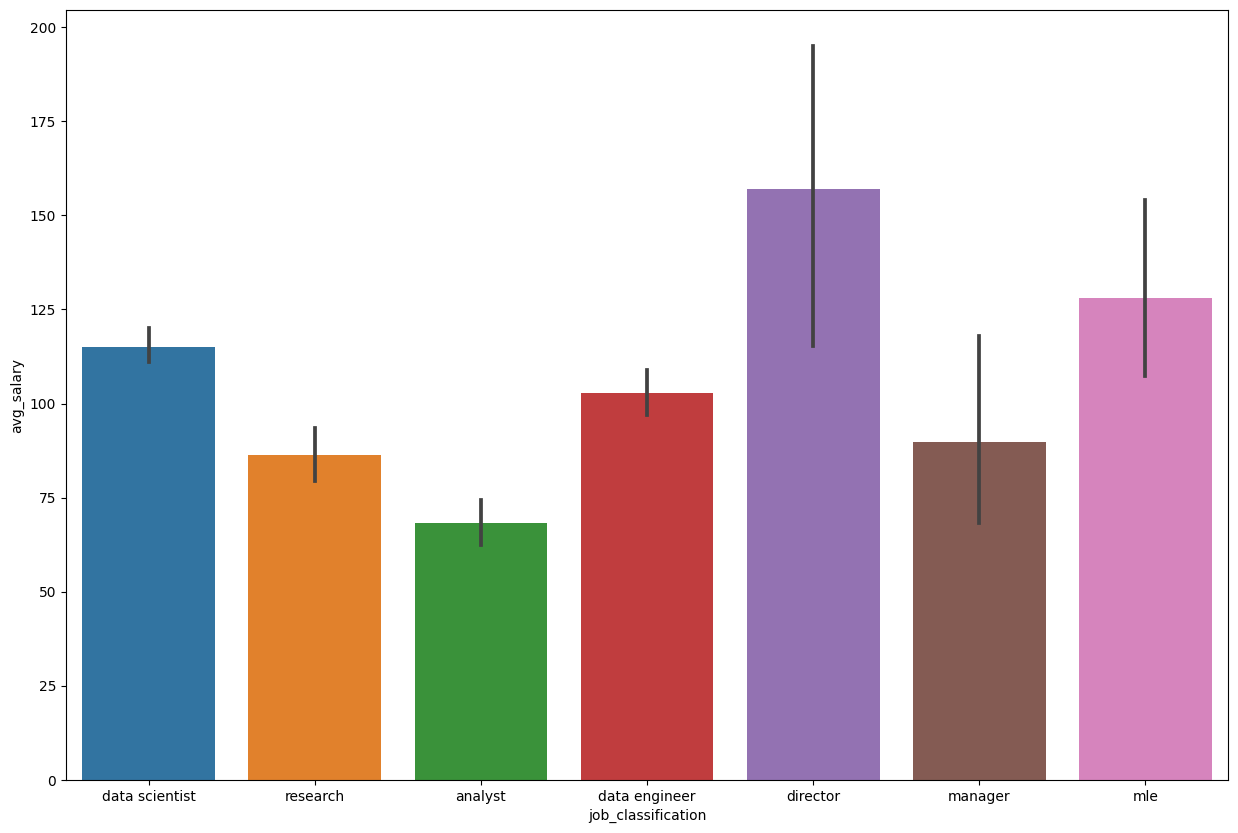

In [50]:
# Barplot of the job_calssification according to average salary

fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x = "job_classification",y="avg_salary",data = df,ax = ax)

plt.title ='Barplot of job_classification according to average salary'
plt.xlabel = "Job Classification"
plt.ylabel ="Average Salary"
plt.show()

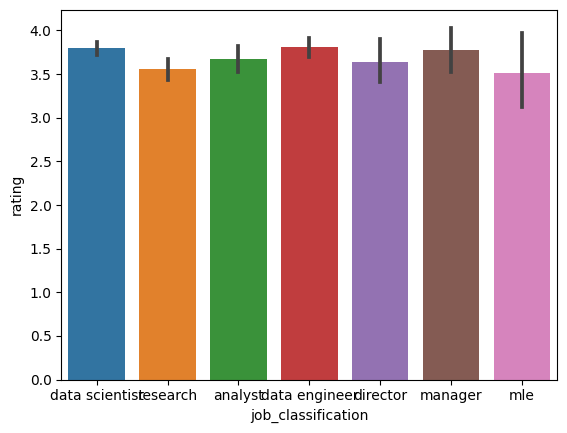

In [51]:
# Scatter plot according the ranking


sns.barplot(x = "job_classification", y="rating",data =df)

plt.xlabel = "job_classification"
plt.ylabel = "rating"
plt.title = "job_classification according company ranking"

plt.show()


<Axes: xlabel='size_range', ylabel='count'>

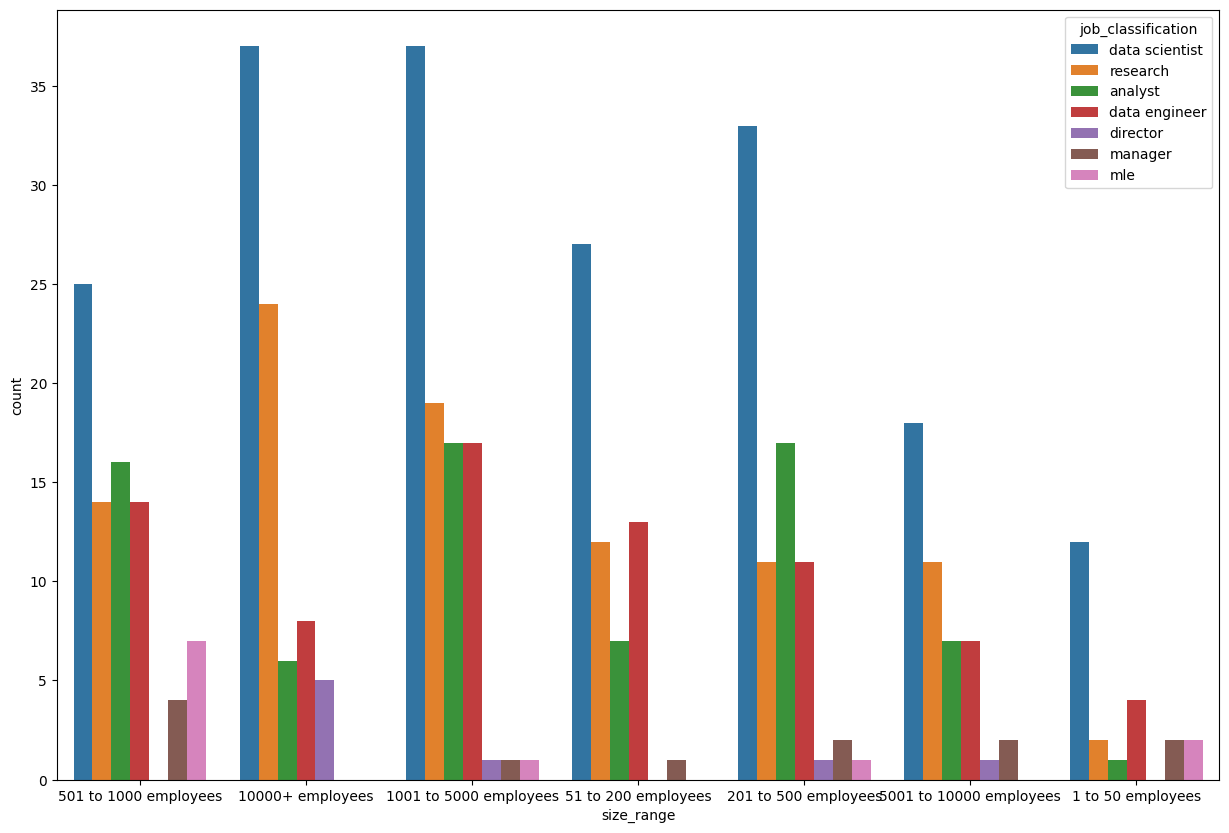

In [52]:
# countplot of the job classification according to company size

fig, ax = plt.subplots(figsize=(15, 10))

sns.countplot(x="size_range",hue = "job_classification",data = df,ax = ax)


In [53]:
df["industry"].unique()

array(['Aerospace & Defense', 'Health Care Services & Hospitals',
       'Security Services', 'Energy', 'Advertising & Marketing',
       'Real Estate', 'Banks & Credit Unions', 'Consulting', 'Internet',
       'Other Retail Stores', 'Research & Development',
       'Department, Clothing, & Shoe Stores', 'Biotech & Pharmaceuticals',
       'Motion Picture Production & Distribution',
       'Enterprise Software & Network Solutions', 'Insurance Carriers',
       'Insurance Agencies & Brokerages', 'Logistics & Supply Chain',
       'Telecommunications Services', 'IT Services',
       'Computer Hardware & Software', 'Consumer Products Manufacturing',
       'Industrial Manufacturing', 'Metals Brokers',
       'Financial Transaction Processing', 'Sporting Goods Stores',
       'Staffing & Outsourcing', 'Wholesale', 'Mining',
       'Financial Analytics & Research', 'Federal Agencies',
       'Education Training Services',
       'Transportation Equipment Manufacturing', 'Farm Support Servic

<Axes: xlabel='industry', ylabel='count'>

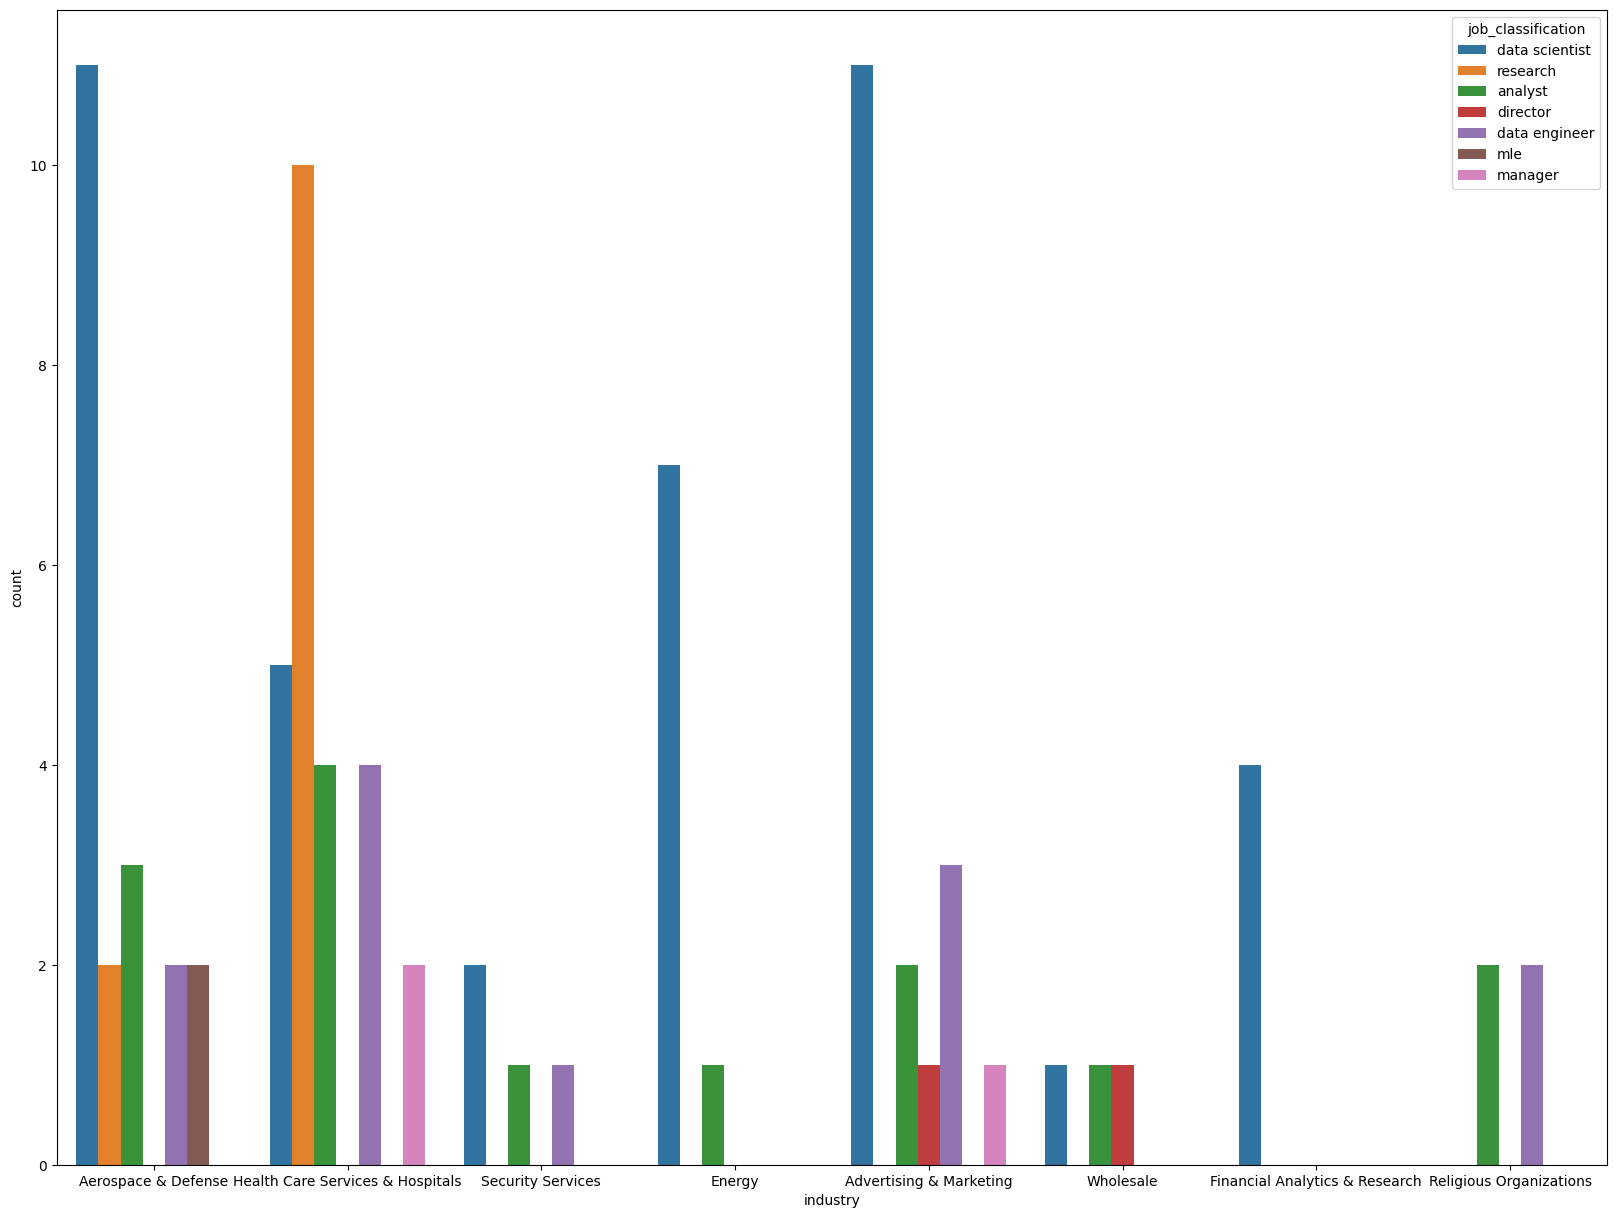

In [54]:
# countplot  according the industry
fig, ax = plt.subplots(figsize=(20, 15))

industry_filter_1 = df[(df['industry'] == 'Health Care Services & Hospitals') | (df['industry'] == 'Aerospace & Defense')
                      | (df['industry'] == 'Security Services')
                      | (df['industry'] == 'Energy')
                      | (df['industry'] == 'Advertising & Marketing')
                      | (df['industry'] == 'Wholesale')
                      | (df['industry'] == 'Financial Analytics & Research')
                      | (df['industry'] == 'Religious Organizations')]

sns.countplot(x = "industry", hue = "job_classification",data =industry_filter_1)


In [55]:
df["city_state"].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' OH', ' AL',
       ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' DC', ' NC', ' AZ',
       ' NE', ' MN', ' UT', ' TN', ' DE', ' ID', ' RI', ' IA', ' SC',
       ' KS'], dtype=object)

<Axes: xlabel='city_state', ylabel='count'>

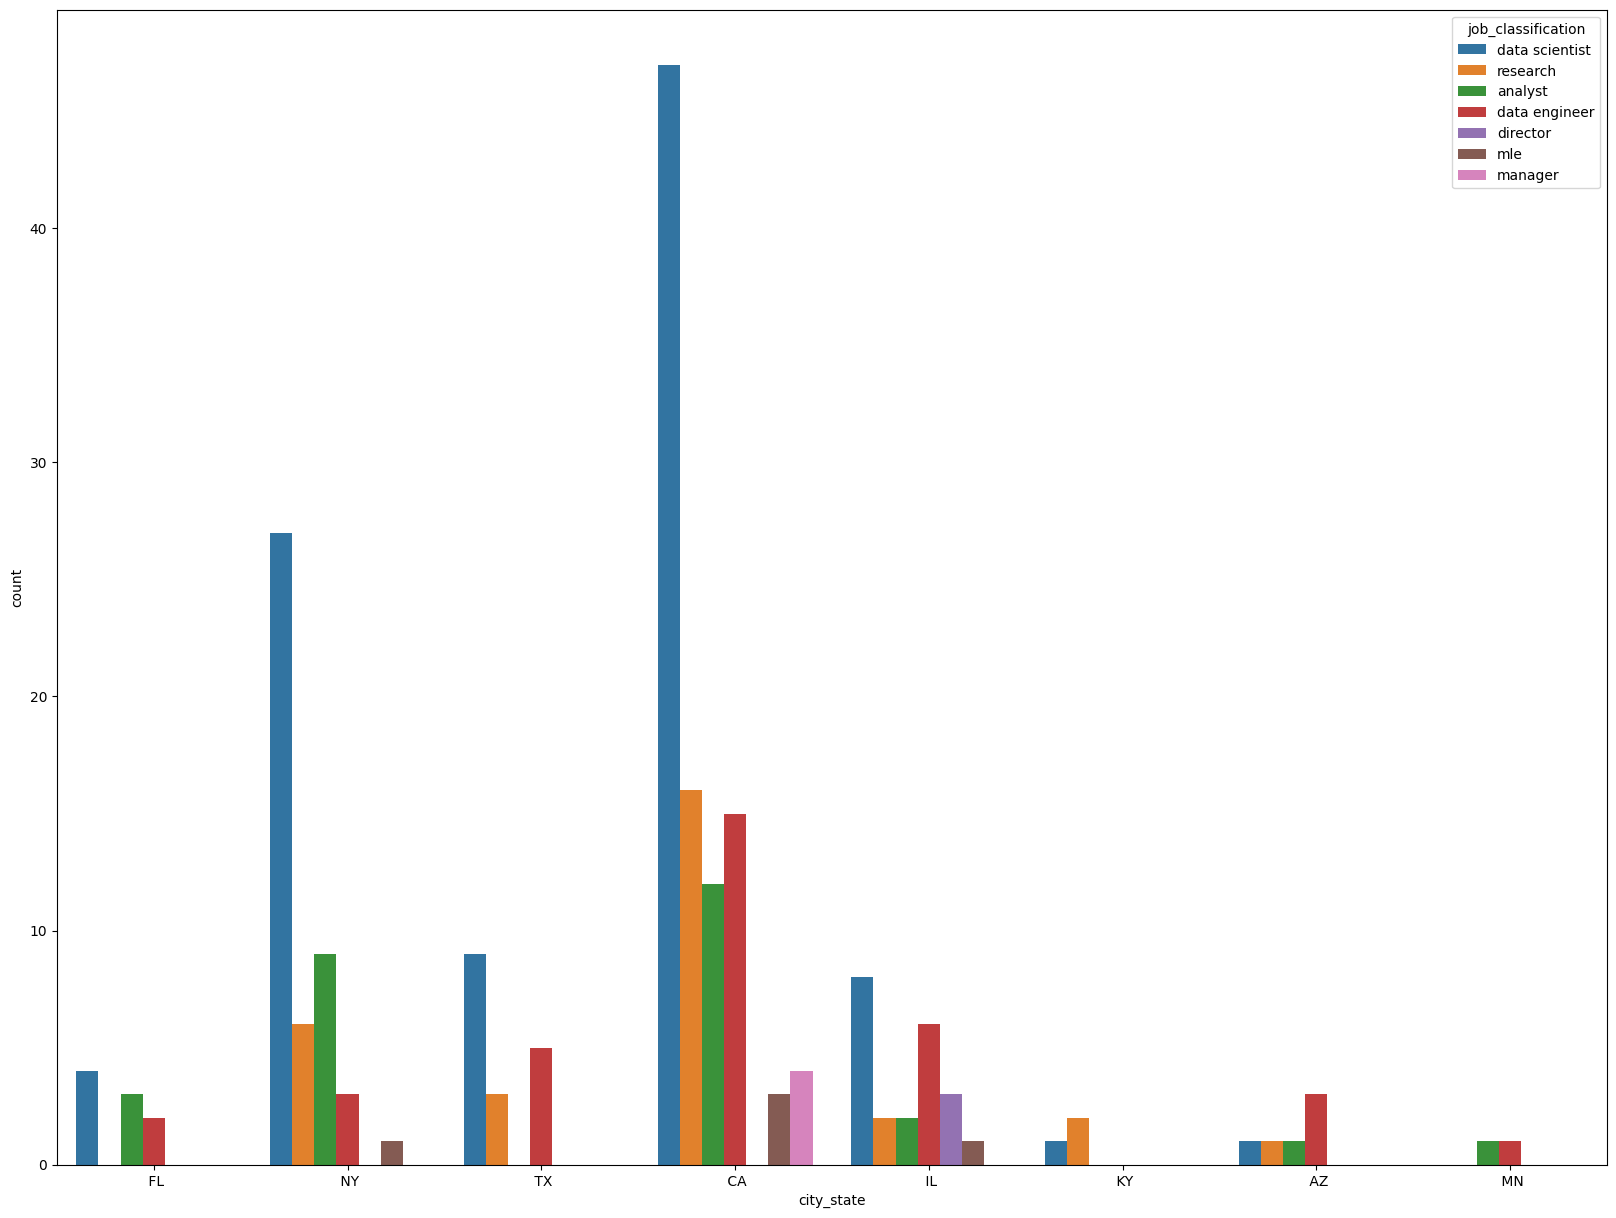

In [56]:
# Countplot plot according the state
fig, ax = plt.subplots(figsize=(20, 15))

state_filter_1 = df[(df['city_state'] == ' CA') | (df['city_state'] == ' NY')
                      | (df['city_state'] == ' IL')
                      | (df['city_state'] == ' AZ')
                      | (df['city_state'] ==  ' KY')
                      | (df['city_state'] == ' MN' )
                      | (df['city_state'] == ' TX')
                      | (df['city_state'] == ' FL')]

sns.countplot(x = "city_state", hue="job_classification",data =state_filter_1)



In [57]:
df["type_of_ownership"].unique()

array(['Company - Private', 'Other Organization', 'Government',
       'Company - Public', 'Hospital', 'Subsidiary or Business Segment',
       'Nonprofit Organization', 'Unknown', 'College / University',
       'School / School District'], dtype=object)

<Axes: xlabel='type_of_ownership', ylabel='count'>

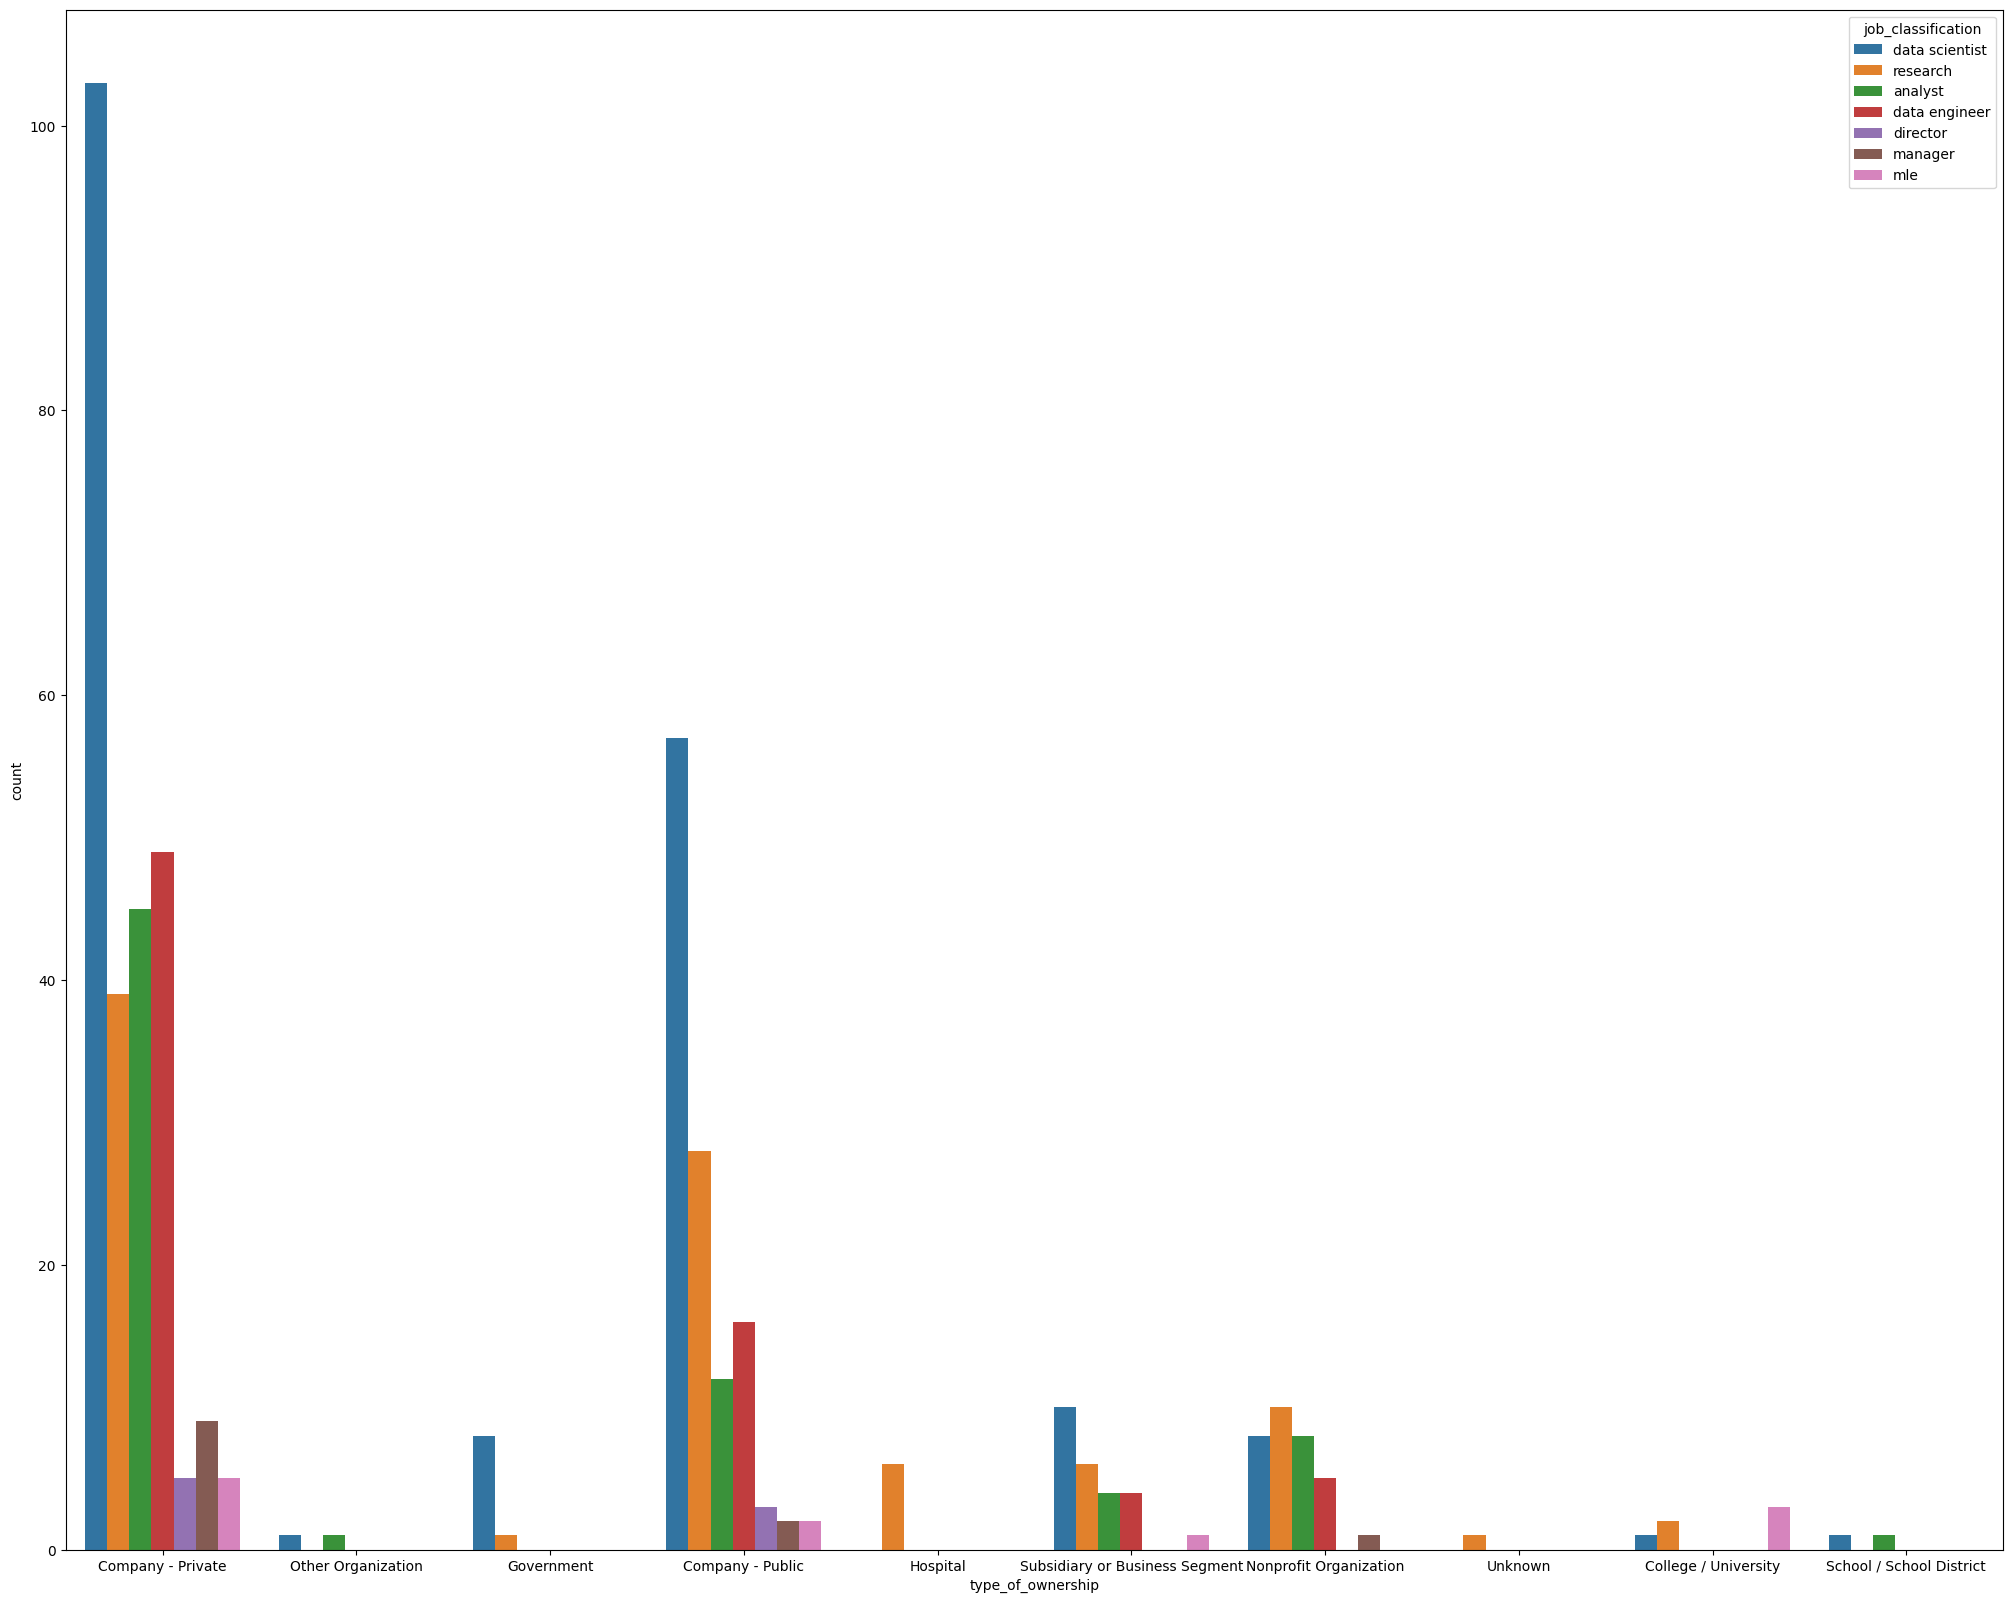

In [58]:
# Countplot according the type of ownership
fig, ax = plt.subplots(figsize=(25, 20))



sns.countplot(x = "type_of_ownership", hue="job_classification",data =df)



In [59]:
#  value_counts = df["company_name"].value_counts()

# filtered_df = df[df['company_name'].isin(value_counts.index[value_counts > 3])]

# filtered_df['company_name'].unique()

In [60]:
# Barplot plot of average salary according the company name
# fig, ax = plt.subplots(figsize=(25, 20))

# company_filter_1 = df[(df['company_name'] == 'PNNL  3.8') | (df['company_name'] == 'Takeda Pharmaceuticals  3.7')
#                       | (df['company_name'] ==  'MassMutual  3.6')
#                       | (df['company_name'] == 'Reynolds American  3.1')
#                       | (df['company_name'] ==  'Software Engineering Institute  2.6')
#                       | (df['company_name'] == 'AstraZeneca  3.9' )
#                       | (df['company_name'] == 'Novetta  4.0')
#                       | (df['company_name'] == 'MITRE  3.2')]



# sns.countplot(x = "company_name", hue="job_classification",data =company_filter_1)



## Data transformation

In [61]:
Y = df['job_classification']

In [62]:
X_1 = df[['company_name','city','type_of_ownership','industry','size_range']]

In [63]:
#X_1 = pd.get_dummies(Y_1)

In [64]:
X_1

,company_name,city,type_of_ownership,industry,size_range
0,Tecolote Research 3.8,Albuquerque,Company - Private,Aerospace & Defense,501 to 1000 employees
1,University of Maryland Medical System 3.4,Linthicum,Other Organization,Health Care Services & Hospitals,10000+ employees
2,KnowBe4 4.8,Clearwater,Company - Private,Security Services,501 to 1000 employees
3,PNNL 3.8,Richland,Government,Energy,1001 to 5000 employees
4,Affinity Solutions 2.9,New York,Company - Private,Advertising & Marketing,51 to 200 employees
...,...,...,...,...,...
453,Medidata Solutions 4.3,New York,Company - Public,Enterprise Software & Network Solutions,1001 to 5000 employees
454,"DatamanUSA, LLC 3.4",Olympia,Company - Private,IT Services,51 to 200 employees
455,23andMe 4.0,South San Francisco,Company - Private,Biotech & Pharmaceuticals,501 to 1000 employees
456,CK-12 Foundation 4.1,Palo Alto,Company - Private,K-12 Education,1 to 50 employees


In [65]:
X = pd.concat([X_1,df['avg_salary']],axis = 1)

# Classification

In [66]:
# Importing sklearn packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Random Forest

In [68]:
# Importer les bibliothèques nécessaires

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score

import time

startR = time.time()





# Séparer les données en variables explicatives et cible
XR = df.drop('Job Title', axis=1)
yR = df['Job Title']

# Diviser les données en ensembles de formation et de test
X_trainR, X_testR, y_trainR, y_testR = train_test_split(XR, yR, test_size=0.2, random_state=42)

# Effectuer le one-hot encoding sur les données d'entraînement et de test
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_encodedR = ohe.fit_transform(X_trainR)
X_test_encodedR = ohe.transform(X_testR)

# Instancier le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# Entraîner le modèle sur les données d'entraînement
rf_model.fit(X_train_encodedR, y_trainR)

# Faire des prédictions sur les données de test
y_predR = rf_model.predict(X_test_encodedR)

# Calculer la précision du modèle
accuracyR = accuracy_score(y_testR, y_predR)
precisionR = precision_score(y_testR, y_predR, average='weighted')
recallR = recall_score(y_testR, y_predR, average='weighted')
print("Accuracy:", accuracyR)
print("Precision:", precisionR)
print("Recall:", recallR)
print("Execussion Time : " ,time.time() - startR)


Accuracy: 0.31521739130434784
Precision: 0.13242368177613323
Recall: 0.31521739130434784
Execussion Time :  3.8575599193573


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gradient Boosting 

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score


startB = time.time()


# Split the dataset into features and labels
XB = df.drop('Job Title', axis=1)
yB = df['Job Title']

# Perform one-hot encoding on categorical features
# One-hot encode categorical features
cat_features = ['company_name', 'job_classification','city_state','city','size_range','type_of_ownership','industry']
onehot_encoder = OneHotEncoder()
X_encodedB = pd.concat([XB.drop(cat_features, axis=1), pd.DataFrame(onehot_encoder.fit_transform(XB[cat_features]).toarray())], axis=1)

# Convert feature names to strings
X_encodedB.columns = X_encodedB.columns.astype(str)

# Split the dataset into training and testing sets
X_trainB, X_testB, y_trainB, y_testB = train_test_split(X_encodedB, yB, test_size=0.3, random_state=42)

# Train a Gradient Boosting classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_trainB, y_trainB)

# Make predictions on the test set
y_predB = gb_model.predict(X_testB)

# Compute precision and recall
precisionB = precision_score(y_testB, y_predB, average='macro')
recallB = recall_score(y_testB, y_predB, average='macro')
accuracyB = accuracy_score(y_testB, y_predB)

print("Precision:", precisionB)
print("Recall:", recallB)
print("Accuracy: ", accuracyB)
print("Execussion Time : " ,time.time() - startB)

Precision: 0.00633291582526009
Recall: 0.014335161964472308
Accuracy:  0.2391304347826087
Execussion Time :  88.4154577255249


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree Classifier 

In [73]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score

startD = time.time()



# Split the dataset into training and testing sets
XD = df.drop('Job Title', axis=1) # Features
yD = df['Job Title'] # Target variable
# One hot encode the categorical features
cat_features = ['company_name','city','size_range','type_of_ownership','industry']
onehot_encoder = OneHotEncoder()
X_encodedD = pd.concat([X.drop(cat_features, axis=1), pd.DataFrame(onehot_encoder.fit_transform(X[cat_features]).toarray())], axis=1)

# Split the dataset into training and testing sets
X_trainD, X_testD, y_trainD, y_testD = train_test_split(X_encodedD, yD, test_size=0.2, random_state=42)

# Convert all feature names to string data type
X_trainD.columns = X_trainD.columns.astype(str)
X_testD.columns = X_testD.columns.astype(str)

# Train a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_trainD, y_trainD)

# Make predictions on the test set
y_predD = dt_classifier.predict(X_testD)

# Compute accuracy, precision, and recall
accuracy = accuracy_score(y_testD, y_predD)
precision = precision_score(y_testD, y_predD, average='weighted')
recall = recall_score(y_testD, y_predD, average='weighted')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print("Execussion Time : " ,time.time() - startD)

Accuracy: 0.13043478260869565
Precision: 0.09954710144927537
Recall: 0.13043478260869565
Execussion Time :  0.06956362724304199


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Olap Queries
## Iceberg Queries
The 5 companies with the highest sum of average salary

In [74]:
# Regrouper les données par nom d'entreprise et calculer la somme des salaires moyens pour chaque entreprise
grouped = df.groupby('company_name').agg({'avg_salary': 'sum'})

# Trier les résultats par ordre décroissant de salaire total
sorted_df = grouped.sort_values('avg_salary', ascending=False)

# Limiter les résultats aux cinq premières entreprises ayant les salaires totaux les plus élevés
top_5 = sorted_df.head(5)
print(top_5)

                              avg_salary
company_name                            
Takeda Pharmaceuticals 3.7         900.0
MassMutual 3.6                     790.5
Liberty Mutual Insurance 3.3       667.5
Novetta 4.0                        623.0
AstraZeneca 3.9                    611.5


Windowing Queries

Rank the companies according to the average of their salaries

In [75]:
df['avg_salary_company'] = df.groupby('company_name')['avg_salary'].transform('mean')

# Attribution du rang à chaque entreprise selon la moyenne des salaires
df['company_rank'] = df.groupby('company_name')['avg_salary_company'].transform(lambda x: x.argsort().argsort()+1)

# Affichage des résultats
grouped_company = df.groupby(['company_name', 'company_rank']).agg({'avg_salary': 'mean'}).reset_index().sort_values(['company_rank', 'avg_salary'], ascending=[True, False])
print(grouped_company)

                    company_name  company_rank  avg_salary
151                   Gallup 4.2             1       237.5
338             Sage Intacct 4.7             1       232.5
162             Grand Rounds 4.2             1       221.5
97             Credit Sesame 4.1             1       205.0
407  The Climate Corporation 3.2             1       194.0
..                           ...           ...         ...
390   Takeda Pharmaceuticals 3.7             6       102.5
325        Reynolds American 3.1             6        80.5
391   Takeda Pharmaceuticals 3.7             7       154.5
222               MassMutual 3.6             7        68.5
223               MassMutual 3.6             8        91.5

[458 rows x 3 columns]


# Drill Down Analysis
1) Drill down query from Job Classification to Job Title

Average minimum salary in all data scientist job

In [76]:
grouped_class = df.groupby('job_classification').agg({'min_salary': 'mean'})

# Afficher les résultats
print(grouped_class)

                    min_salary
job_classification            
analyst              48.633803
data engineer        73.945946
data scientist       87.481481
director            119.875000
manager              62.666667
mle                  92.090909
research             61.462366


Average minimum salary in senior data scientist jobs

In [77]:
# Vérifier si la colonne 'job_title' contient la valeur 'Senior Data Scientist'
# Filtrer les données pour les emplois de Senior data scientist et calculer la moyenne du salaire minimum pour chaque titre de poste
grouped_senior = df[df['Job Title'] == 'Senior Data Scientist'].groupby('Job Title').agg({'min_salary': 'mean'})

# Afficher les résultats
print(grouped_senior)

                       min_salary
Job Title                        
Senior Data Scientist  107.380952


Average minimum salary in data scientists jobs

In [78]:
grouped_title = df[df['job_classification'] == 'data scientist'].groupby('Job Title').agg({'min_salary': 'mean'})

# Afficher les résultats
print(grouped_title)

                                                    min_salary
Job Title                                                     
Ag Data Scientist                                         60.0
Associate Data Scientist/Computer Scientist               60.0
Associate Machine Learning Engineer / Data Scie...        53.0
Clinical Data Scientist                                   63.0
College Hire - Data Scientist - Open to Decembe...        63.0
...                                                        ...
Sr. Data Scientist - Analytics, Personalized He...       131.0
Sr. Data Scientist II                                    111.0
Sr. Data Scientist, Cyber-Security LT Contract           116.0
Staff Data Scientist                                     132.0
Staff Data Scientist - Technology                        106.0

[66 rows x 1 columns]


# 2) Drill Down Query from Industry to company_name
Average of average salary in the indutries that hire data Scientist

In [79]:
# Filtrer les données pour les emplois de data scientist et calculer la moyenne du salaire moyen pour chaque industrie
grouped_industry = df[df['job_classification'] == 'data scientist'].groupby('industry').agg({'avg_salary': 'mean'})

# Afficher les résultats
print(grouped_industry)

                                         avg_salary
industry                                           
Accounting                               113.500000
Advertising & Marketing                  102.045455
Aerospace & Defense                      109.000000
Auctions & Galleries                     128.000000
Banks & Credit Unions                     91.166667
Biotech & Pharmaceuticals                126.238095
Brokerage Services                        85.000000
Colleges & Universities                  113.250000
Computer Hardware & Software             130.653846
Consulting                               111.272727
Consumer Product Rental                   97.500000
Consumer Products Manufacturing          103.000000
Department, Clothing, & Shoe Stores      139.000000
Education Training Services               81.500000
Energy                                    83.571429
Enterprise Software & Network Solutions  140.888889
Farm Support Services                     80.500000
Federal Agen

Average of salary in the security services industry

In [80]:
grouped_company = df[df['industry'] == 'Security Services'].groupby('company_name').agg({'avg_salary': 'max'})

# Afficher les résultats
print(grouped_company)

                               avg_salary
company_name                             
KnowBe4 4.8                          85.0
Praetorian 4.7                      138.5
Rapid Response Monitoring 4.7        85.5



Average of average salary in the praetorian 4.7 company

In [81]:
# Filtrer les données pour l'entreprise Praetorian 4.7 et calculer le salaire moyen maximum pour cette entreprise
grouped_praetorian = df[df['company_name'] == 'Praetorian  4.7'].groupby('company_name').agg({'avg_salary': 'max'})

# Afficher les résultats
print(grouped_praetorian)

Empty DataFrame
Columns: [avg_salary]
Index: []


# ROLL UP
## 1) Roll Up from Job Title to Job Classification
Average minimum salary in senior scientist jobs

In [82]:
# Filtrer les données pour les emplois de Senior Data Scientist et calculer la moyenne du salaire minimum pour chaque classification de poste
grouped_classification = df[df['Job Title'] == 'Senior Data Scientist']

# Afficher les résultats
print(grouped_classification)

      id              Job Title  rating                       company_name  \
36    37  Senior Data Scientist     3.5                      Sartorius 3.5   
41    42  Senior Data Scientist     4.3             Equity Residential 4.3   
54    55  Senior Data Scientist     4.4    The David J. Joseph Company 4.4   
95    96  Senior Data Scientist     4.2                         Gallup 4.2   
97    98  Senior Data Scientist     3.3  American Axle & Manufacturing 3.3   
120  121  Senior Data Scientist     4.0                        Novetta 4.0   
144  145  Senior Data Scientist     3.8               Juniper Networks 3.8   
154  155  Senior Data Scientist     4.0                       Autodesk 4.0   
161  162  Senior Data Scientist     3.3        Plymouth Rock Assurance 3.3   
168  169  Senior Data Scientist     3.9                        Zest AI 3.9   
231  232  Senior Data Scientist     4.1               CK-12 Foundation 4.1   
234  235  Senior Data Scientist     3.7                       Sw

Average minimum salary un data engineer jobs

In [83]:
grouped_classification = df[df['job_classification'] == 'data engineer'].groupby('Job Title').agg({'min_salary': 'mean'})

# Afficher les résultats
print(grouped_classification)

                                                    min_salary
Job Title                                                     
Associate Data Engineer                              45.000000
Associate Director, Platform and DevOps- Data E...  113.000000
Big Data Engineer                                    73.000000
Big Data Engineer - Chicago - Future Opportunity     71.000000
Data Engineer                                        65.972222
Data Engineer - Consultant (Charlotte Based)         59.000000
Data Engineer - ETL                                  44.000000
Data Engineer 4 - Contract                           59.000000
Data Engineer 5 - Contract (Remote)                  74.000000
Data Engineer I                                     102.000000
Data Engineer I - Azure                              54.000000
Data Engineer, Data Engineering and Artifical I...   71.000000
Data Engineering Analyst                             44.000000
IT - Data Engineer II                                61

Average minimum salary in all data scientist job classifications

In [84]:
grouped_classification = df[df['job_classification'] == 'data scientist'].groupby('job_classification').agg({'min_salary': 'mean'})

# Afficher les résultats
print(grouped_classification)

                    min_salary
job_classification            
data scientist       87.481481


# 2) Roll Up Queries from company_name to Industry
Average of average salary in the Praetorian 4.7 company

In [85]:
grouped_industry = df[df['company_name'] == 'Praetorian  4.7'].groupby('industry').agg({'avg_salary': 'max'})

# Afficher les résultats
print(grouped_industry)

Empty DataFrame
Columns: [avg_salary]
Index: []


Average of average salary in the Security Services industry

In [86]:
# Calculer le salaire moyen maximum pour chaque entreprise de l'industrie Security Services
grouped_company = df[df['industry'] == 'Security Services'].groupby('company_name').agg({'avg_salary': 'max'})

# Afficher les résultats
print(grouped_company)

                               avg_salary
company_name                             
KnowBe4 4.8                          85.0
Praetorian 4.7                      138.5
Rapid Response Monitoring 4.7        85.5


Average of average salary in the industries that hire data scientist

In [87]:
# Calculer la moyenne du salaire moyen pour chaque industrie qui embauche des Data Scientists
grouped_industry = df[df['job_classification'] == 'data scientist'].groupby('industry').agg({'avg_salary': 'mean'})

# Afficher les résultats
print(grouped_industry)

                                         avg_salary
industry                                           
Accounting                               113.500000
Advertising & Marketing                  102.045455
Aerospace & Defense                      109.000000
Auctions & Galleries                     128.000000
Banks & Credit Unions                     91.166667
Biotech & Pharmaceuticals                126.238095
Brokerage Services                        85.000000
Colleges & Universities                  113.250000
Computer Hardware & Software             130.653846
Consulting                               111.272727
Consumer Product Rental                   97.500000
Consumer Products Manufacturing          103.000000
Department, Clothing, & Shoe Stores      139.000000
Education Training Services               81.500000
Energy                                    83.571429
Enterprise Software & Network Solutions  140.888889
Farm Support Services                     80.500000
Federal Agen

# SLICE

1) Sum of average salary of data scientist jobs in New York

In [88]:
grouped_job = df[df['city'] == 'New York'].groupby('Job Title').agg({'avg_salary': 'sum'})
print (grouped_job)

                                                    avg_salary
Job Title                                                     
Associate Machine Learning Engineer / Data Scie...        74.5
Business Data Analyst                                     53.5
Business Data Analyst, SQL                                65.0
Data & Analytics Consultant (NYC)                        114.5
Data Analyst                                             125.5
Data Analyst, Performance Partnership                     73.0
Data Architect / Data Modeler                             86.5
Data Engineer                                            175.0
Data Scientist                                          1432.0
Data Scientist - Alpha Insights                          172.0
Data Scientist Manager                                   147.0
Data Scientist/ML Engineer                                97.0
Lead Data Analyst                                         47.0
Machine Learning Engineer                              

2) Sum of min salary of data scientist jobs with company size between 5001 and 10000

In [89]:
grouped_job = df[df['size_range'] == '5001-10000'].groupby('Job Title').agg({'min_salary': 'sum'})
print(grouped_job)

Empty DataFrame
Columns: [min_salary]
Index: []


# DICE
 1) Sum of average salary of data scientist jobs in New York with company size is between 5001 and 10000


In [90]:
grouped_job = df[(df['city'] == 'New York') & (df['size_range'] == '5001-10000')].groupby('Job Title').agg({'avg_salary': 'sum'})
print(grouped_job)

Empty DataFrame
Columns: [avg_salary]
Index: []
